In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import re 
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_excel (r'/content/drive/MyDrive/Internship/Project 4 - Simulating Subjective Judgment Aggregation/TlabWinter2021/yusuke_2021_spacialexperience_runme_raw_21_06_22.xlsx')
#print (df)

In [ ]:
df = pd.DataFrame(df, columns= ['values.img_file', 'response'])
#print(df)

In [ ]:
totalRows = df.shape[0]
print(totalRows)

735


##Creat columns and sort the data

In [ ]:
def extract(df):
  shape = pd.DataFrame(df, columns= ['values.img_file'])
  response = pd.DataFrame(df, columns= ['response'])

  # extract "Did you see each dots"
  temp = response.iloc[1:80:4]
  DidYouSeeEachDots = []
  for ind in temp.index:
    DidYouSeeEachDots.append(temp['response'][ind])

  # extract dots_actual
  temp = shape.iloc[0:80:4]
  dots_actual = []
  for ind in temp.index:
    dots_actual.append([int(num) for num in re.findall(r"\d+",  shape['values.img_file'][ind])])

  # extract dots_predict
  temp = response.iloc[2:80:4]
  dots_predict = []
  for ind in temp.index:
    dots_predict.append(temp['response'][ind])

  # extract shape_actual
  # you will have to extract manually later
  temp = shape.iloc[3:80:4]
  shape_actual = []
  for ind in temp.index:
    # extract string 
    shape_actual.append(temp['values.img_file'][ind])

  # extract shape_predict
  temp = response.iloc[3:80:4]
  shape_predict = []
  for ind in temp.index:
    # add DeepLearning
    shape_predict.append(temp['response'][ind])

  # extract general info
  general_info = response.iloc[80:86]

  return DidYouSeeEachDots, dots_actual, dots_predict, shape_actual, shape_predict, general_info

##Save sorted dataframe to Excel

In [ ]:
def SaveExcel(shape_actual, shape_predict, i):
  df1 = pd.DataFrame(list(zip(shape_actual, shape_predict)),  columns=['shape_actual', 'shape_predict'])
  if i == 0:
    df1.to_excel("output.xlsx", sheet_name='Sheet_name' + str(i))
  else: #add to existing sheet
    with pd.ExcelWriter('output.xlsx', mode='a') as writer:
      df1.to_excel(writer, sheet_name='Sheet_name' + str(i))
  print(df1)

##Plot Confusion matrix

In [ ]:
def confusionMatrix(shape_actual, shape_predict, i):
  #confusinon matrix
  from sklearn.metrics import confusion_matrix
  labels=["Line", "Triangle", "Circle", "dots", "BlankScreen", "NoResponse"]
  x = confusion_matrix(shape_predict, shape_actual, labels=labels)
  plt.imshow(x, cmap='Blues', interpolation='nearest')
  plt.title('Confusion matrix of the subject' + str(i))
  plt.xlabel('True')
  plt.ylabel('Predicted')
  plt.colorbar()
  plt.show()

#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels

#Main Script 

##Save each participants to different sheets

In [ ]:
df_list = list()
for i in range(int(totalRows/105 )):
  temp = df.iloc[105*i+17:105*i+105] 
  df_list.append(temp)
  DidYouSeeEachDots, dots_actual, dots_predict, shape_actual, shape_predict, general_info = extract(df_list[i])
  SaveExcel(shape_actual, shape_predict, i)

            shape_actual shape_predict
0        0RandomDots.jpg  blank-screen
1   40RandomDotsLine.jpg          line
2   20RandomDotsLine.jpg         curve
3        0RandomDots.jpg           NaN
4        0RandomDots.jpg           NaN
5        0RandomDots.jpg           NaN
6   70RandomDotsLine.jpg      triangle
7        8RandomDots.jpg           NaN
8        0RandomDots.jpg           NaN
9       16RandomDots.jpg           NaN
10      32RandomDots.jpg           NaN
11  50RandomDotsLine.jpg         curve
12       1RandomDots.jpg           NaN
13     128RandomDots.jpg           NaN
14       2RandomDots.jpg           NaN
15       4RandomDots.jpg           NaN
16      64RandomDots.jpg           NaN
17  60RandomDotsLine.jpg        circle
18  30RandomDotsLine.jpg          line
19       0RandomDots.jpg           NaN
            shape_actual         shape_predict
0        0RandomDots.jpg             many-dots
1   20RandomDotsLine.jpg   many-dots-in-a-line
2        2RandomDots.jpg         only-tw

##analysis on manually modified data on Excel

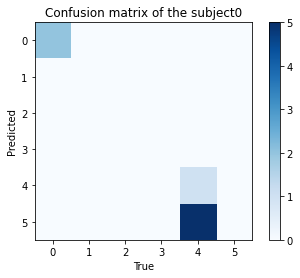

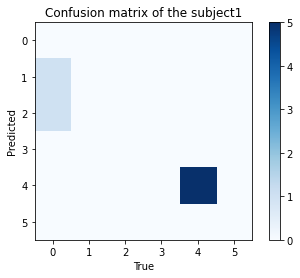

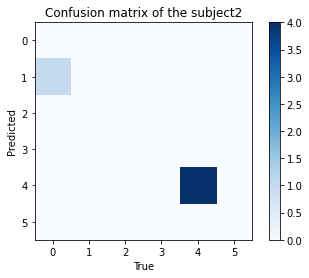

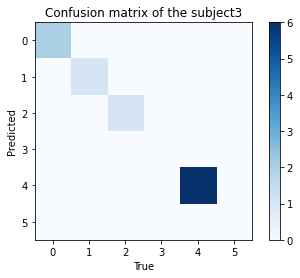

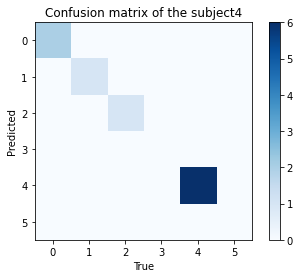

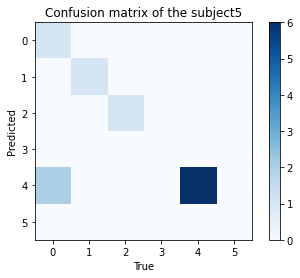

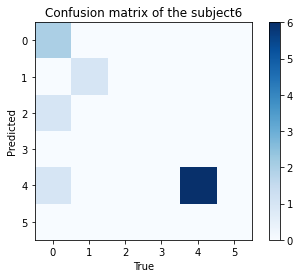

In [ ]:
#labels=["Line", "Triangle", "Circle", "Dots", "BlankScreen", "NoResponse"]
for i in range(7):

  df = pd.read_excel (r'/content/drive/MyDrive/Internship/Project 4 - Simulating Subjective Judgment Aggregation/TlabWinter2021/output_shape.xlsx', sheet_name='Sheet_name' + str(i))
  shape_actual = pd.DataFrame(df, columns= ['shape_actual'])
  shape_predict = pd.DataFrame(df, columns= ['shape_predict'])
  #print (shape_actual)
  #print(shape_predict)
  confusionMatrix(shape_actual, shape_predict, i)